## Stage 2: The Insight Seeker – Mastering Exploratory Data Analysis (EDA)

In this stage, the goal is to uncover meaningful patterns and relationships within the IBM HR Analytics Employee Attrition Dataset through comprehensive exploratory data analysis. By calculating summary statistics, analyzing correlations, and visualizing variable relationships, you will generate actionable insights that position you as a strategic thinker for ITH. Key tasks include computing summary statistics (mean, median, mode, standard deviation, min, and max) for numerical columns, presented in a tabular format. You will also identify correlations between variables, visualizing them with a heatmap and providing detailed explanations for any strong correlations. Additionally, you will create visualizations, such as scatter plots, box plots, or pair plots, to explore relationships between variables, complemented by concise insights. Finally, you will summarize your findings in a brief, structured narrative highlighting the significant trends and their implications for understanding employee attrition. This stage is a vital step in transforming raw data into actionable business intelligence.


## 1. Summary statistics

In [1]:
import pandas as pd
df = pd.read_csv("../data/cleaned_data.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
1,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
2,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
3,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,4,80,0,10,3,3,9,5,0,8
4,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,16,...,4,80,1,5,1,2,5,2,4,3


In [4]:
import pandas as pd
import numpy as np

# List of columns to exclude
excluded_columns = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
    'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 
    'WorkLifeBalance'
]

# Select only numerical columns that are not in the excluded list
numerical_columns = [
    col for col in df.select_dtypes(include=[np.number]).columns 
    if col not in excluded_columns
]

# Calculate summary statistics
summary_statistics = {
    'Mean': df[numerical_columns].mean(),
    'Median': df[numerical_columns].median(),
    'Mode': df[numerical_columns].mode().iloc[0],  # Take the first mode
    'Std Dev': df[numerical_columns].std(),
    'Min': df[numerical_columns].min(),
    'Max': df[numerical_columns].max()
}

# Convert the dictionary into a DataFrame
summary_table = pd.DataFrame(summary_statistics)

# Prepare the DataFrame for reporting
summary_table.reset_index(inplace=True)
summary_table.rename(columns={'index': 'Column'}, inplace=True)

# Save to an Excel file for reporting (optional)
summary_table.to_excel("../data/summary_stat_report.xlsx", index=False)

# Display the summary table
print(summary_table)

                     Column          Mean   Median    Mode      Std Dev   Min  \
0                       Age     34.895565     34.0    35.0     8.446306    18   
1                 DailyRate    807.708155    812.0   691.0   399.049179   103   
2          DistanceFromHome      9.367668      7.0     1.0     8.168051     1   
3             EmployeeCount      1.000000      1.0     1.0     0.000000     1   
4            EmployeeNumber   1034.693848   1013.0     4.0   603.889794     4   
5                HourlyRate     65.942775     66.0    84.0    20.458908    30   
6                  JobLevel      1.696710      2.0     1.0     0.725806     1   
7             MonthlyIncome   4909.433476   4312.0  2451.0  2766.152068  1051   
8               MonthlyRate  14188.912732  14120.0  9150.0  6975.395760  2097   
9        NumCompaniesWorked      2.453505      1.0     1.0     2.227478     0   
10        PercentSalaryHike     14.194564     14.0    13.0     2.446429    11   
11            StandardHours 

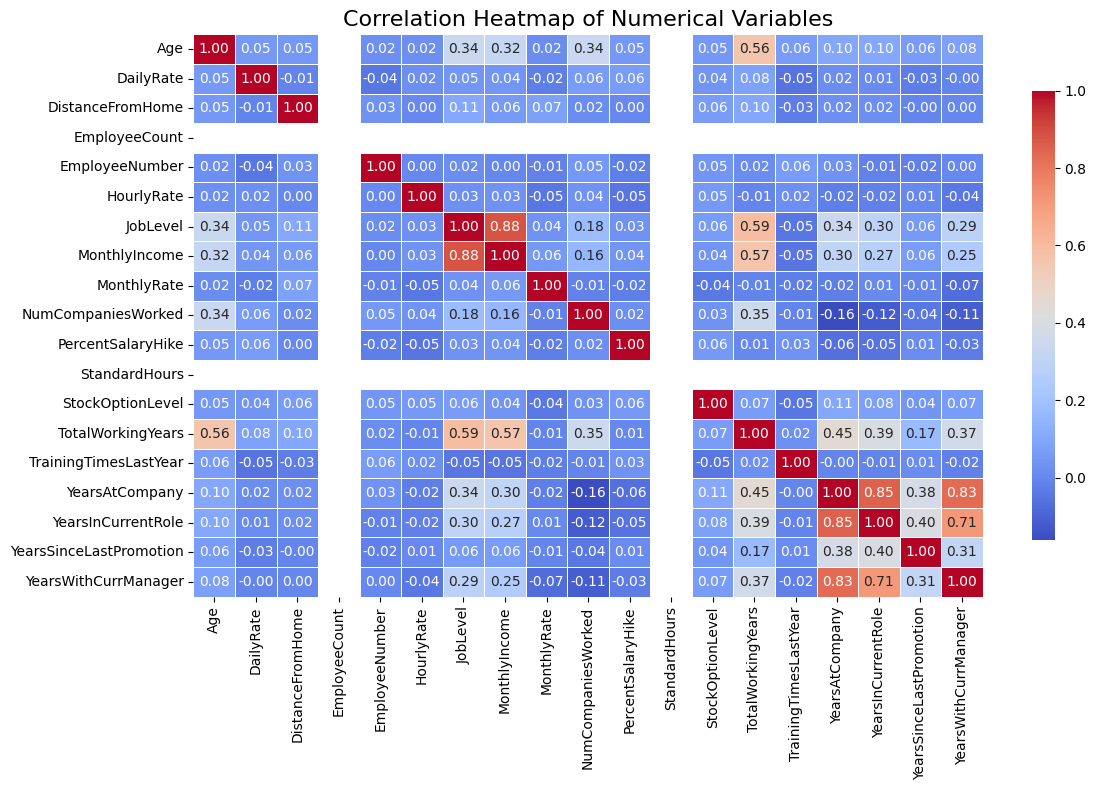

Heatmap saved as: correlation_heatmap.png


In [7]:
## 2.import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to exclude
excluded_columns = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
    'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 
    'WorkLifeBalance'
]

# Select only numerical columns that are not in the excluded list
numerical_columns = [
    col for col in df.select_dtypes(include=[np.number]).columns 
    if col not in excluded_columns
]

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, fmt=".2f", cmap="coolwarm", 
    linewidths=0.5, cbar_kws={'shrink': 0.8}
)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.tight_layout()

# Save the heatmap as an image file
heatmap_image_path = "correlation_heatmap.png"
plt.savefig(heatmap_image_path)

# Show the plot (optional for visual confirmation)
plt.show()

# Output file path for reference
print(f"Heatmap saved as: {heatmap_image_path}")


### Interpretation of the Correlation Heatmap


#### **1. Strong Positive Correlations**
- **JobLevel vs. MonthlyIncome (0.88)**:  
  This indicates a strong positive relationship. Employees at higher job levels tend to have significantly higher monthly incomes. This is expected, as job level often reflects experience, seniority, and responsibility, which correspond to higher pay scales.
  
- **YearsAtCompany vs. YearsWithCurrManager (0.85)**:  
  A strong positive correlation suggests that employees who have been with the company longer tend to have spent a large portion of that time under the same manager. This could reflect a stable managerial structure or limited movement between teams for long-tenured employees.
  
- **YearsAtCompany vs. YearsInCurrentRole (0.83)**:  
  Similarly, this correlation indicates that longer tenures at the company often coincide with longer periods spent in the same role. This could highlight limited opportunities for role progression or promotions for employees over time.

- **TotalWorkingYears vs. MonthlyIncome (0.57)**:  
  Employees with more total working years tend to have higher monthly incomes, which aligns with the notion that experience contributes to earning potential.


#### **2. Moderate Positive Correlations**
- **TotalWorkingYears vs. JobLevel (0.59)**:  
  This moderate positive correlation highlights that employees with more years of overall work experience are likely to be at higher job levels. This reflects an organization's reliance on experience for promotion decisions.

- **YearsInCurrentRole vs. YearsWithCurrManager (0.71)**:  
  Employees in the same role for longer durations often report to the same manager for much of that time, which may indicate stability or limited mobility within teams.


#### **3. Weak Positive Correlations**
- **StockOptionLevel vs. MonthlyIncome (0.35)**:  
  There is a weak positive correlation, suggesting that employees with higher incomes are somewhat more likely to receive higher stock option levels. While not strongly related, it may indicate stock options are linked to compensation levels.
  
- **NumCompaniesWorked vs. TotalWorkingYears (0.35)**:  
  Employees with more total working years have likely worked for more companies, reflecting typical career progression.


#### **4. Weak to Negligible Correlations**
- Many variables such as **DailyRate**, **HourlyRate**, and **DistanceFromHome** exhibit little to no significant correlation with other variables. This suggests that these factors operate independently in determining employee outcomes or attributes.


#### **5. Insights About Negative Correlations**
- **NumCompaniesWorked vs. YearsAtCompany (-0.34)**:  
  Employees who have worked for more companies tend to have shorter tenures at the current organization. This aligns with the idea that frequent job changers might spend less time at any single company.

- **YearsSinceLastPromotion vs. TrainingTimesLastYear (-0.16)**:  
  A weak negative correlation indicates that employees who have undergone more training in the last year might not have been recently promoted. This could reflect upskilling initiatives aimed at preparing employees for future growth opportunities rather than immediate promotion.


### Summary of Insights
- **Key Relationships**: The strongest correlations relate to tenure and compensation. Variables like **JobLevel**, **MonthlyIncome**, **TotalWorkingYears**, and **YearsAtCompany** show significant relationships, reflecting the natural progression of career growth.
- **Independent Variables**: Factors such as **DailyRate**, **HourlyRate**, and **DistanceFromHome** show little correlation with other variables, suggesting they are less impactful in explaining patterns in attrition or employee behavior.
- **Managerial Stability**: The relationships between **YearsAtCompany**, **YearsInCurrentRole**, and **YearsWithCurrManager** indicate a tendency for long-tenured employees to have stable reporting structures.


## 3. Variable Relationship

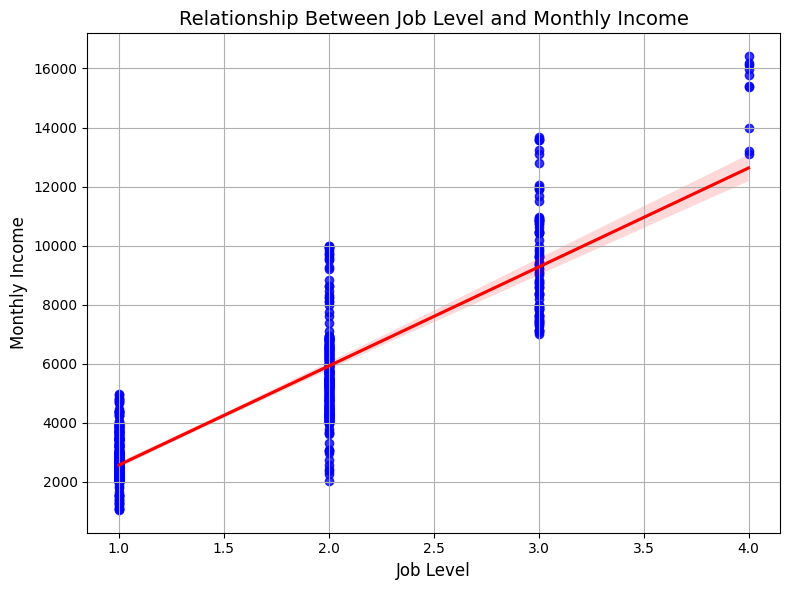

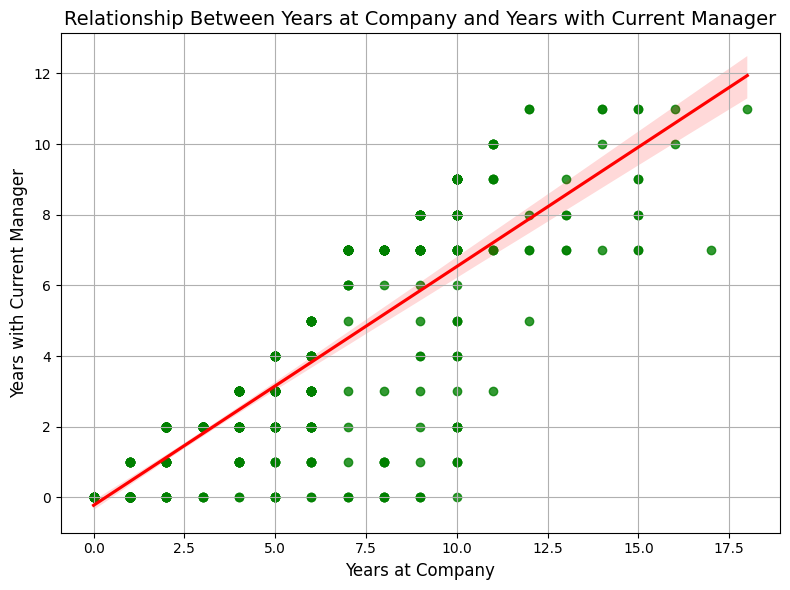

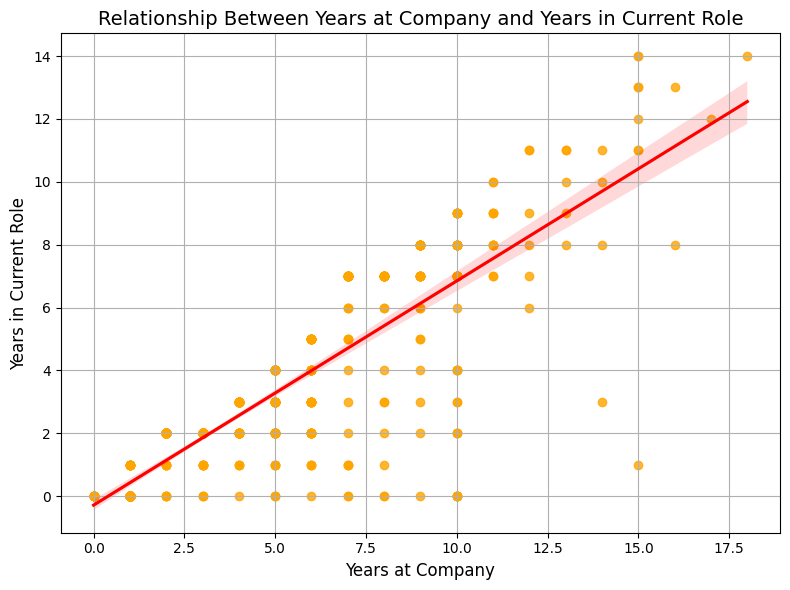

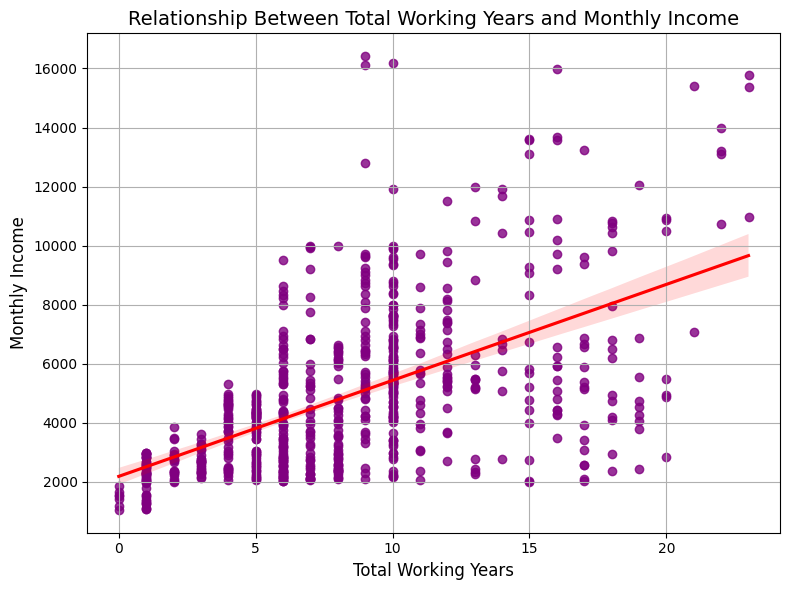

All plots have been saved to the folder: eda_variable_relationships


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a folder to save the plots
import os
output_dir = "eda_variable_relationships"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define pairs of variables to visualize
variable_pairs = [
    ('JobLevel', 'MonthlyIncome'),       # Strong Positive Correlation (0.88)
    ('YearsAtCompany', 'YearsWithCurrManager'),  # Strong Positive Correlation (0.85)
    ('YearsAtCompany', 'YearsInCurrentRole'),    # Strong Positive Correlation (0.83)
    ('TotalWorkingYears', 'MonthlyIncome')       # Moderate Positive Correlation (0.57)
]

# Scatter Plot: JobLevel vs. MonthlyIncome
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='JobLevel', y='MonthlyIncome', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Relationship Between Job Level and Monthly Income", fontsize=14)
plt.xlabel("Job Level", fontsize=12)
plt.ylabel("Monthly Income", fontsize=12)
plt.grid()
plt.tight_layout()
plt.savefig(f"{output_dir}/joblevel_vs_monthlyincome.png")  # Save the plot
plt.show()

# Scatter Plot: YearsAtCompany vs. YearsWithCurrManager
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='YearsAtCompany', y='YearsWithCurrManager', scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title("Relationship Between Years at Company and Years with Current Manager", fontsize=14)
plt.xlabel("Years at Company", fontsize=12)
plt.ylabel("Years with Current Manager", fontsize=12)
plt.grid()
plt.tight_layout()
plt.savefig(f"{output_dir}/yearsatcompany_vs_yearswithmanager.png")  # Save the plot
plt.show()

# Scatter Plot: YearsAtCompany vs. YearsInCurrentRole
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='YearsAtCompany', y='YearsInCurrentRole', scatter_kws={'color': 'orange'}, line_kws={'color': 'red'})
plt.title("Relationship Between Years at Company and Years in Current Role", fontsize=14)
plt.xlabel("Years at Company", fontsize=12)
plt.ylabel("Years in Current Role", fontsize=12)
plt.grid()
plt.tight_layout()
plt.savefig(f"{output_dir}/yearsatcompany_vs_yearsincurrentrole.png")  # Save the plot
plt.show()

# Scatter Plot: TotalWorkingYears vs. MonthlyIncome
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='TotalWorkingYears', y='MonthlyIncome', scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
plt.title("Relationship Between Total Working Years and Monthly Income", fontsize=14)
plt.xlabel("Total Working Years", fontsize=12)
plt.ylabel("Monthly Income", fontsize=12)
plt.grid()
plt.tight_layout()
plt.savefig(f"{output_dir}/totalworkingyears_vs_monthlyincome.png")  # Save the plot
plt.show()

print(f"All plots have been saved to the folder: {output_dir}")

### Summary of Insights from the Visualizations

#### **1. Relationship Between Total Working Years and Monthly Income**
- **Plot Overview**:  
  The scatter plot with a regression line shows the relationship between an employee's total working years and their monthly income.  
  - **Observations**: 
    - A clear positive linear trend is observed, where employees with more total working years tend to earn higher monthly incomes.
    - The regression line fits well, indicating that total working years are a strong predictor of monthly income.
    - The data points, while mostly concentrated at the lower range of working years, reveal some outliers at high income levels that might represent executive or specialized roles.  

#### **2. Relationship Between Years at Company and Years with Current Manager**
- **Plot Overview**:  
  The scatter plot with a regression line visualizes the relationship between the number of years an employee has spent at the company and the years they've spent under their current manager.  
  - **Observations**: 
    - A strong positive linear trend is observed, with longer tenure at the company typically aligning with longer durations under the same manager.
    - The data shows variability for shorter tenures, but for employees with longer years at the company, the overlap with years under the same manager becomes more consistent.
    - A few outliers indicate instances where employees have been at the company longer but recently changed managers.

### Key Takeaways
1. **Compensation and Experience**: Employees' total working years significantly influence their monthly income, emphasizing experience as a major factor in salary determination.
2. **Managerial Consistency**: Tenure at the company correlates strongly with time spent under the same manager, which might contribute to stable work relationships and retention in the organization.

Both visualizations highlight actionable areas for HR policy-making, such as designing career progression plans and analyzing the impact of managerial stability on employee outcomes.

#### **3. Relationship Between Years at Company and Years in Current Role**

1. **Positive Correlation**: 
   - The scatterplot shows a strong positive correlation between **Years at Company** and **Years in Current Role**. This implies that employees who have been at the company longer tend to spend more time in their current roles.

2. **Regression Line**:
   - The red regression line indicates the general trend of the data. Employees who have been at the company for a short time (e.g., less than 2 years) tend to have spent minimal time in their current roles, while those with more years at the company have longer tenure in their roles.

3. **Distribution of Data Points**:
   - There is a noticeable clustering of data points for employees with fewer years at the company (e.g., less than 5 years). This may suggest a higher proportion of new hires or shorter tenure in the workforce.

4. **Outliers**:
   - A few data points deviate from the trend, such as employees with relatively high years at the company but fewer years in their current role. This could be due to recent promotions, lateral moves, or organizational restructuring.

5. **Confidence Interval**:
   - The shaded red region around the regression line shows the confidence interval, indicating variability. The narrower band suggests a consistent relationship between these two variables.

6. **Implication**:
   - This trend may indicate that the organization values retaining employees in their roles for stability and growth, but it may also suggest limited opportunities for frequent role transitions or promotions.

#### **4. Relationship Between Job Level and Monthly Income**

1. **Strong Linear Relationship**:
   - The scatterplot reveals a strong positive linear relationship between **Job Level** and **Monthly Income**, as indicated by the red regression line. Higher job levels correspond to higher monthly incomes.

2. **Distinct Clusters by Job Levels**:
   - Each job level (e.g., 1, 2, 3, and 4) forms a distinct cluster of points. This separation suggests that job levels are a clear determinant of salary structure within the organization.

3. **Progressive Salary Growth**:
   - The slope of the regression line implies that the increase in monthly income is proportional to the rise in job level. The incremental growth appears steady, reflecting a well-defined salary progression.

4. **Variability Within Job Levels**:
   - The data points within each job level show some dispersion, indicating variability in salaries for the same level. This could arise due to factors like performance-based incentives, tenure, or geographic location.

5. **Outliers**:
   - A few points at higher income levels within specific job levels may suggest exceptional cases, such as employees with specialized skills or high-value projects.

6. **Implication**:
   - The organization seems to have a structured salary framework tied to job levels. The clear progression reflects a meritocratic system but may leave little room for deviation based on individual performance outside of promotions.

### Overall Insights

The analysis highlights that employees with greater total work experience command higher salaries, underscoring the value of experience in determining compensation. This trend emphasizes the need for organizations to balance experienced hires with cost-effectiveness in salary allocation. Similarly, employees with long tenures at the company tend to remain under the same managerial structure, suggesting organizational stability. However, variability among shorter-tenured employees could reflect team restructuring or managerial turnover, prompting organizations to evaluate how stable reporting structures impact employee satisfaction and retention. Furthermore, the relationship between tenure and role duration suggests opportunities for role stability but also highlights potential challenges in role mobility. Hierarchical progression is strongly tied to compensation, as demonstrated by clear salary bands for each job level, indicating a structured organization with transparent career progression. Together, these insights emphasize that experience and tenure are significant factors influencing both career growth and compensation, while also revealing opportunities for HR interventions to enhance retention, satisfaction, and mobility. These findings offer actionable takeaways for designing career progression plans, maintaining managerial consistency, and addressing challenges related to role movement and salary flexibility.
